# 小象学院机器学习集训营-第1阶段-python与数据分析考试

**考试说明:**

- 以下为小象学院机器学习集训营第1阶段python与数据分析部分考试
    - 大家可以通过python与pandas/seaborn或者其他你熟悉的工具库完成这里所列的分析问题

> 提示：大家将使用 jupyter Notebook 来完成项目。
    - 问答题部分，可以在cell中作答，如果开启Markdown格式，可以参考[作业部落Markdown说明](https://www.zybuluo.com/mdeditor)给出的Markdown语法格式说明。
    - 代码题部分，你可以通过单击代码区域，然后使用键盘快捷键 Shift+Enter 或 Shift+Return 来运行代码。或者在选择代码后使用执行（run cell）按钮执行代码。

## google商店应用数据分析
![imglink](https://cdn.wccftech.com/wp-content/uploads/2017/09/download-google-play-store-1.png)
下面给大家提供了一份google应用商店的数据，包含不同的字段信息，我们结合学习过的python数据分析与可视化技能，从各个维度做些分析。

### 工具库引入

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# 这里可以用rcParams做图片大小尺寸的基本设定
rcParams['figure.figsize'] = 16, 8

### 载入数据

In [3]:
apps = pd.read_csv("../hw/googleplaystore.csv")

通过info、shape、describe查看信息

In [4]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
apps.shape

(10841, 13)

In [10]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


可以看到`rating`列是float类型，其余列由字符串对象型组成，共13个属性。乍一看，我们可以看到有一些特性应该是数值（审查、安装量等），但是它们在读取进去后是字符串类型的。为了理解元数据，我们必须查看功能的简要定义：

- **应用程序：**应用程序名称
- **类别：**应用所属类别
- **评级：**应用程序的总体用户评级
- **评论：**应用程序的用户评论数
- **大小：**应用程序的大小
- **安装：**应用程序的用户下载/安装数
- **类型：**付费或免费
- **价格：**应用程序的价格
- **内容分级：**应用程序针对的年龄组-儿童/成人21+/成人
- **题材类型：**一个应用可以属于多个题材类型（除了其主要类别）。例如，一个音乐家庭游戏将属于音乐，游戏，家庭类型。
- **上次更新日期：**应用程序上次在Play Store上更新的日期
- **当前版本：**Play Store上提供的应用程序的当前版本
- **android版本：**min所需的android版本

### 缺失值分析
上述数据里有少数的缺失值，我们来分析和处理一下

In [11]:
# 统计不同字段缺失值数量
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

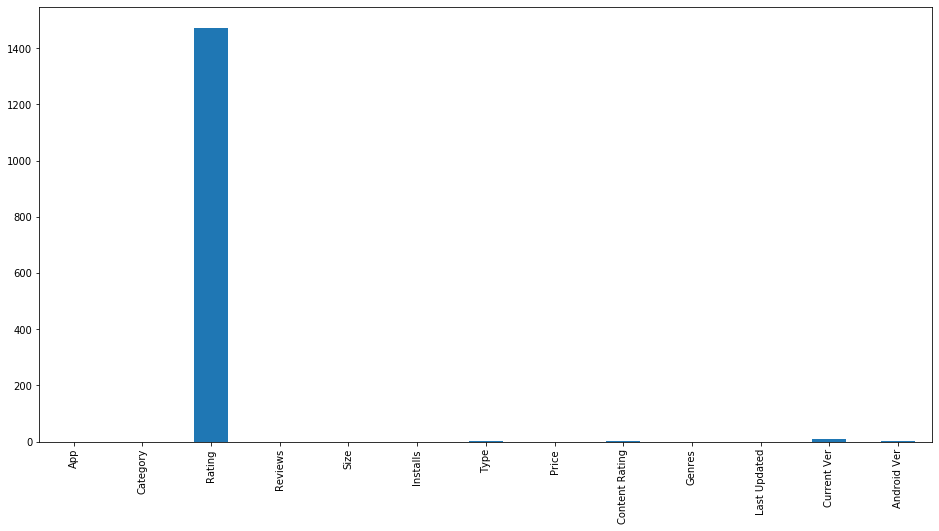

In [12]:
# 不同字段缺失值量绘图
apps.isnull().sum().plot(kind='bar')

In [28]:
# 筛选出缺失的部分数据并展示其中5条
missing_df = apps.loc[apps['Rating'].isnull()|apps['Current Ver'].isnull()|apps['Type'].isnull()|apps['Android Ver'].isnull()|apps['Content Rating'].isnull(),:]
missing_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up


### 打分分析
我们来对`Rating`字段进行一些分析

In [30]:
# 查看有多少中不同的打分
apps.Rating.unique()
len(apps.Rating.unique())

41

In [32]:
# 查看各种打分的数量分布(统计数量)
apps.Rating.value_counts().head()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
Name: Rating, dtype: int64

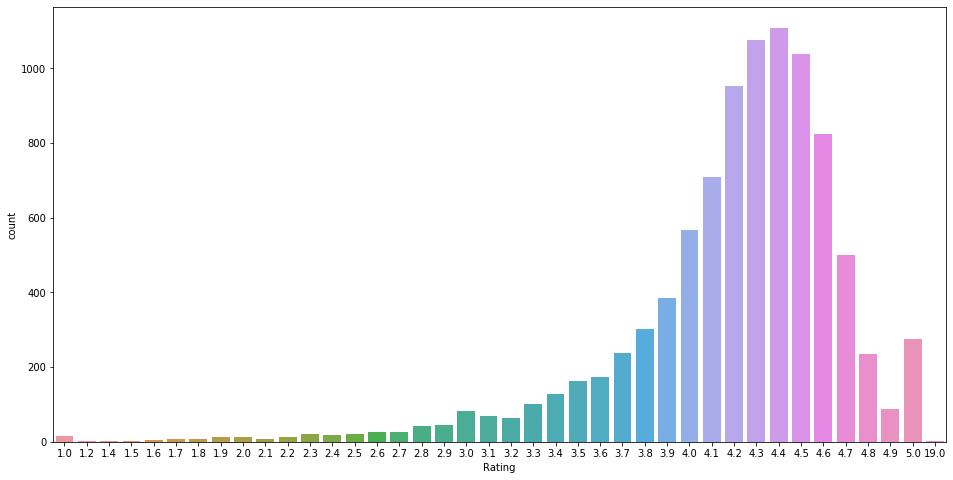

In [37]:
# 可视化上述分布
sns.countplot(apps['Rating'])

注意到有一条很特殊的记录，它的打分是19分，这可能是爬虫抓取时候解析出现问题而导致的异常值

In [38]:
# 选出这条记录，看一眼
apps[apps.Rating==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [39]:
# 剔除这条记录
apps=apps[apps.Rating!=19]

### 类别(Categories)分析

In [42]:
# 不同的类别数量
len(apps.Category.unique())

33

In [43]:
# 列出所有类别
list(apps.Category.unique())

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [48]:
# 不同Category的平均得分
apps.groupby('Category').mean().reset_index()

,Category,Rating
0,ART_AND_DESIGN,4.358065
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.346067
4,BUSINESS,4.121452
5,COMICS,4.155172
6,COMMUNICATION,4.158537
7,DATING,3.970769
8,EDUCATION,4.389032
9,ENTERTAINMENT,4.126174


In [54]:
# 对类别按照平均得分排序
rt_df = apps.groupby('Category').mean().sort_values('Rating',ascending= False)
rt_df

,Rating
Category,
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571
HEALTH_AND_FITNESS,4.277104


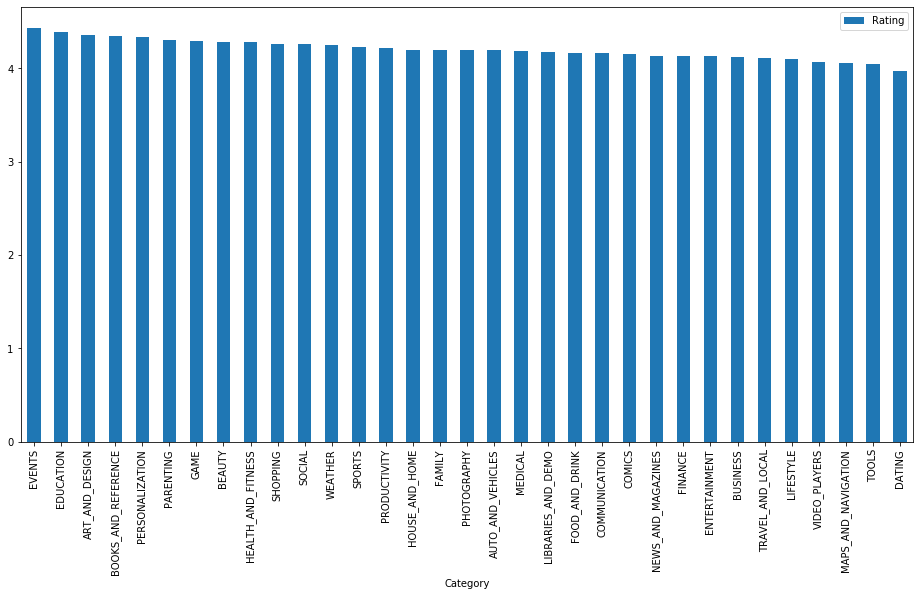

In [55]:
# 按照不同类别平均分从高到低排序绘图
rt_df.plot(kind='bar')

In [62]:
# 不同类型的app数量
cnt_df = apps.groupby('Category').count()['App'].to_frame()
cnt_df

,App
Category,
ART_AND_DESIGN,65
AUTO_AND_VEHICLES,85
BEAUTY,53
BOOKS_AND_REFERENCE,231
BUSINESS,460
COMICS,60
COMMUNICATION,387
DATING,234
EDUCATION,156


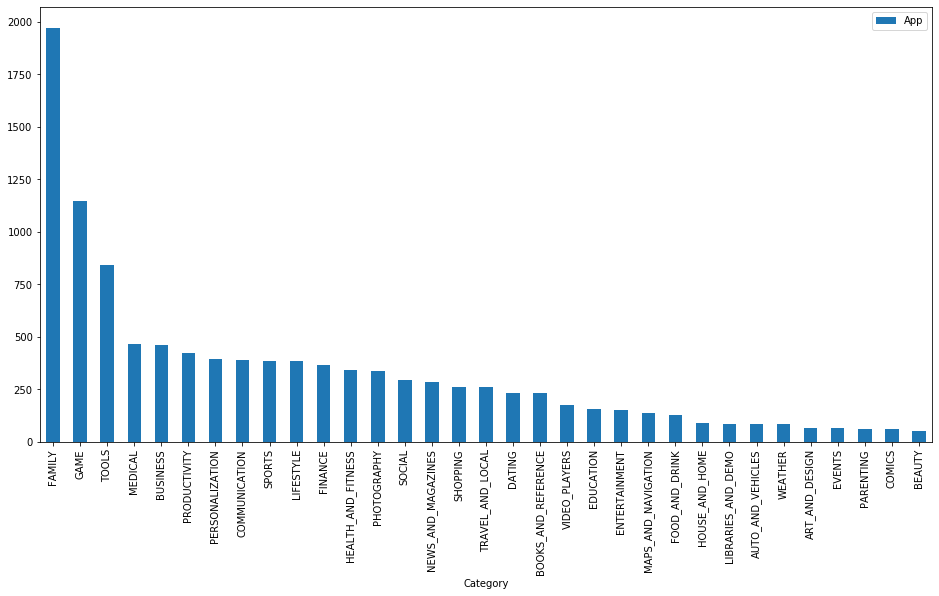

In [66]:
# 绘制柱状图显示不同类型的app数量
cnt_df.sort_values(by='App',ascending=False).plot(kind='bar')

`Content Ratings`这个字段代表APP针对的人群，比如“满18岁的成年人”，“全部人群”。

我们来分析一下，不同类别下，各类人群APP的占比。

In [67]:
# 不同的Content Rating类型包含哪些
apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [74]:
# 不同的Content Rating类型数量
cr_df = apps.groupby('Content Rating').count()['App'].to_frame()
cr_df

,App
Content Rating,
Adults only 18+,3
Everyone,8714
Everyone 10+,414
Mature 17+,499
Teen,1208
Unrated,2


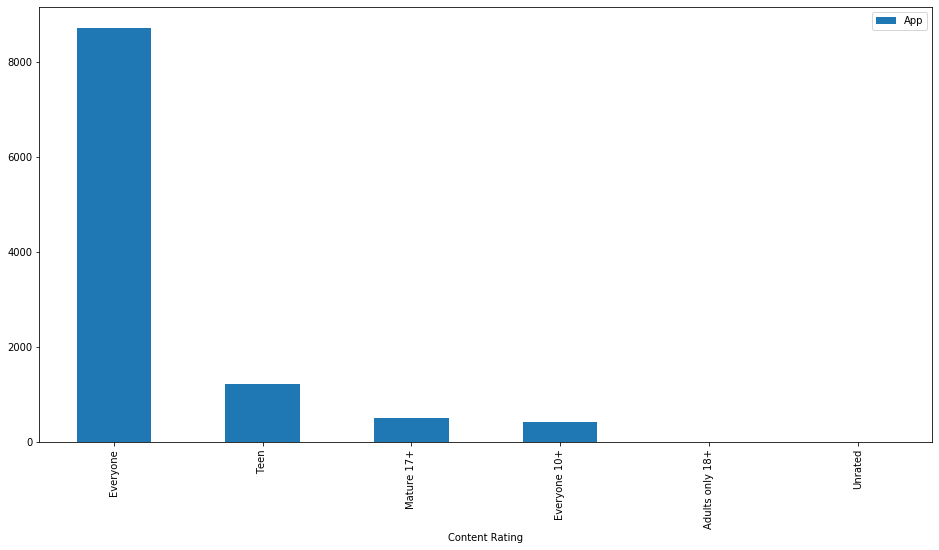

In [76]:
# 不同的Content Rating类型数量绘图
cr_df.sort_values('App',ascending =False).plot(kind='bar')

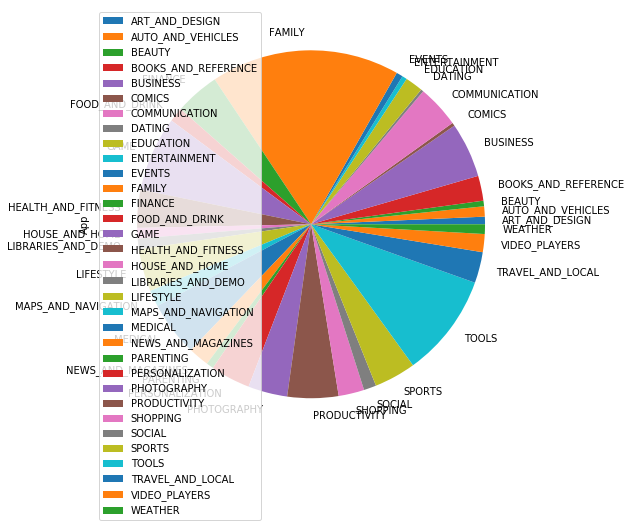

In [94]:
# 筛选出其中适合everyone的APP
# 用饼状图画出不同Category的APP数量占比
evry_df = apps[apps['Content Rating']=='Everyone'].groupby('Category').count()['App'].to_frame()

evry_df.plot.pie(y='App')


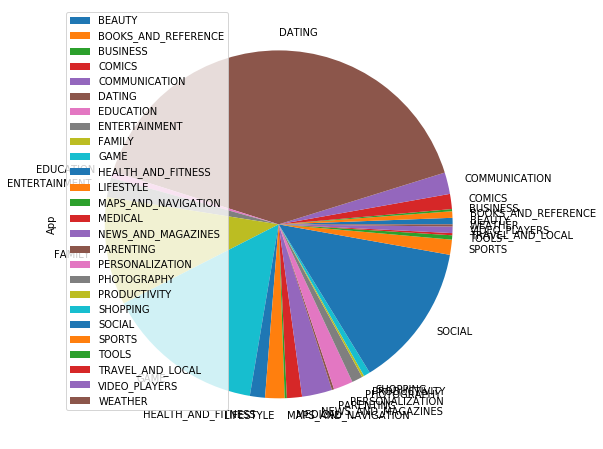

In [95]:
# 筛选出其中适合Mature 17+的APP
# 用饼状图画出不同Category的APP数量占比

M17_df = apps[apps['Content Rating']=='Mature 17+'].groupby('Category').count()['App'].to_frame()
M17_df.plot.pie(y='App')


In [98]:
# 每个Category下不同Content Rating的APP数量
# tips：这里可能会涉及到一个叫做unstack的函数
apps.pivot_table(index='Category', columns='Content Rating', aggfunc='size').fillna(0)



Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,0.0,61.0,1.0,0.0,3.0,0.0
AUTO_AND_VEHICLES,0.0,83.0,1.0,0.0,1.0,0.0
BEAUTY,0.0,45.0,2.0,3.0,3.0,0.0
BOOKS_AND_REFERENCE,0.0,202.0,5.0,3.0,21.0,0.0
BUSINESS,0.0,445.0,1.0,1.0,13.0,0.0
COMICS,2.0,26.0,3.0,7.0,22.0,0.0
COMMUNICATION,0.0,345.0,0.0,10.0,32.0,0.0
DATING,0.0,21.0,0.0,201.0,12.0,0.0
EDUCATION,0.0,144.0,8.0,3.0,1.0,0.0


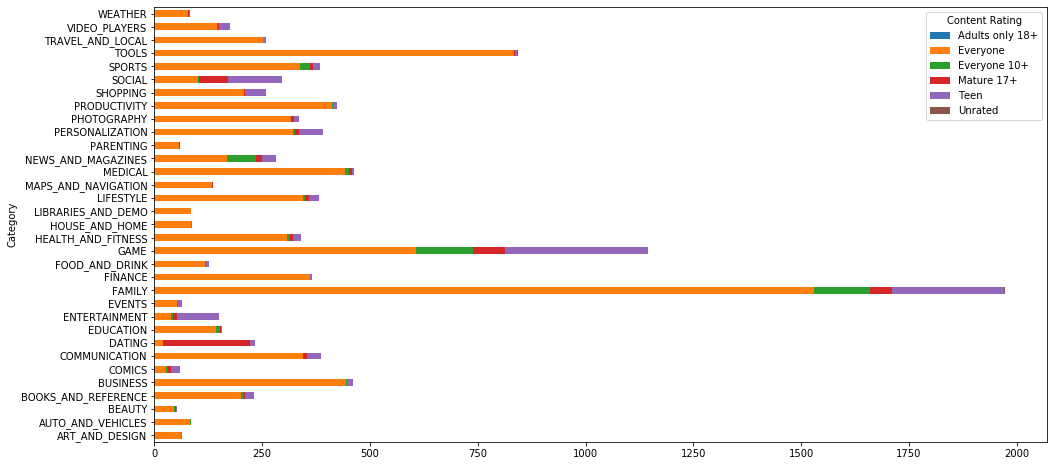

In [99]:
# 用堆叠柱状图表示每个Category下不同Content Rating的APP数量

apps.pivot_table(index='Category', columns='Content Rating', aggfunc='size').plot.barh(stacked=True)


### 版本分析

我们对`Android Ver`进行分析，这个字段表示不同的安卓版本。

In [101]:
# 通过value_counts了解不同的安卓版本分布

apps['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
5.0 - 7.1.1              1
2.2 - 7.1.1              1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [133]:
# 取出版本的第1个整数作为安卓系统的版本号，比如 4.1 => 4
# 注意剔除其中的“Varies with device”这个非数字类型
apps_df=apps[apps['Android Ver']!='Varies with device']
apps_df=apps_df[apps_df['Android Ver'].notnull()]
apps_df['Android lable'] = apps_df['Android Ver'].str[0:1].astype('int')
apps_df['Android lable'].value_counts()

4    6959
2    1351
5     629
3     287
1     138
6      60
7      46
8       6
Name: Android lable, dtype: int64

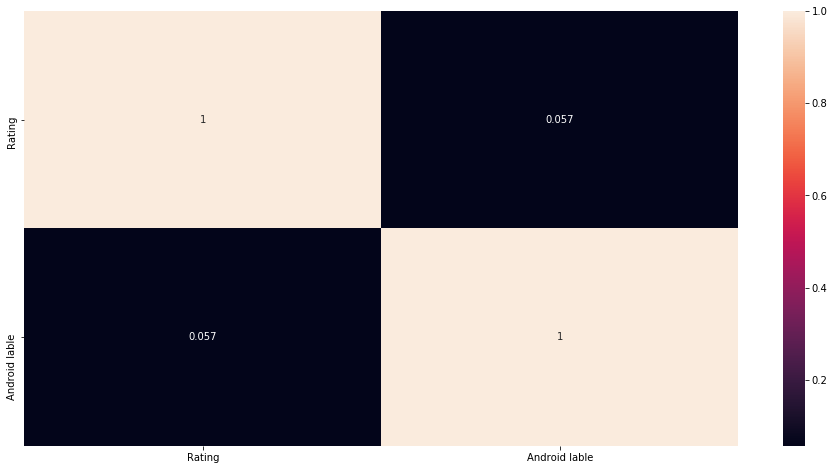

In [137]:
# 计算安卓系统版本支持与打分的相关性
# 并绘制heatmap
rt_v=apps_df.loc[:,['Rating','Android lable']]
rt_v.corr()
sns.heatmap(rt_v.corr(),annot= True)

看起来好像相关性并不大

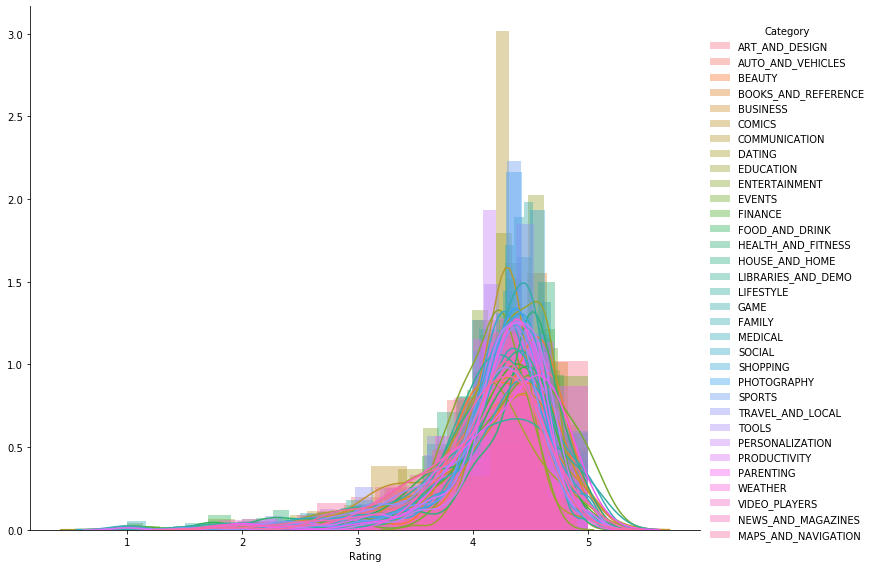

In [153]:
# 按照不同的category查看打分的分布
c_r = apps.loc[:,['Category','Rating']]
g = sns.FacetGrid(c_r[['Category','Rating']], hue="Category")
fig = plt.gcf()
fig.set_size_inches(10, 8)
g = g.map(sns.distplot, "Rating").add_legend()

### 评论数分析

In [187]:
# 把评论数转成int类型

apps.loc[:,'Reviews']=apps.loc[:,'Reviews'].apply(lambda x:int(x) if x else 0)

Text(0, 0.5, 'Frequency')

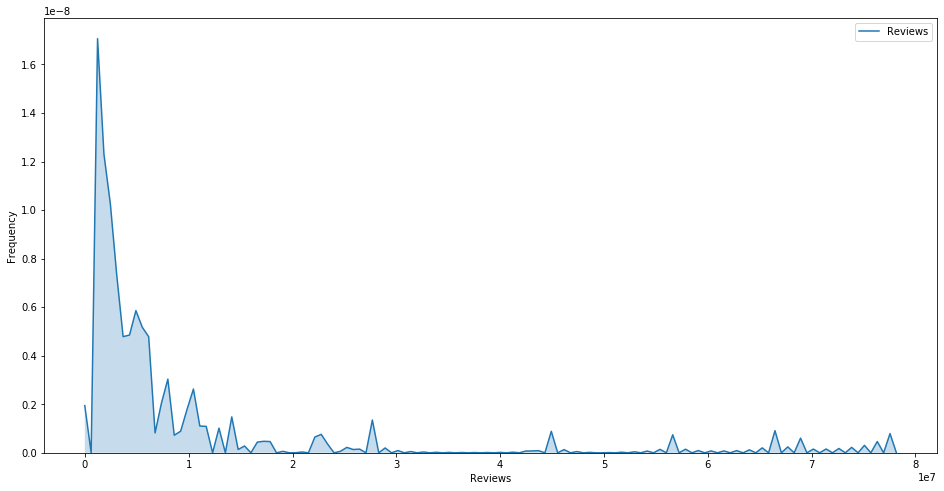

In [189]:
# 查看总的评论数分布状况
sns.kdeplot(apps.Reviews,shade=True)
plt.xlabel('Reviews')
plt.ylabel('Frequency')

Text(0.5, 1, 'Boxplot of Reviews VS Category')

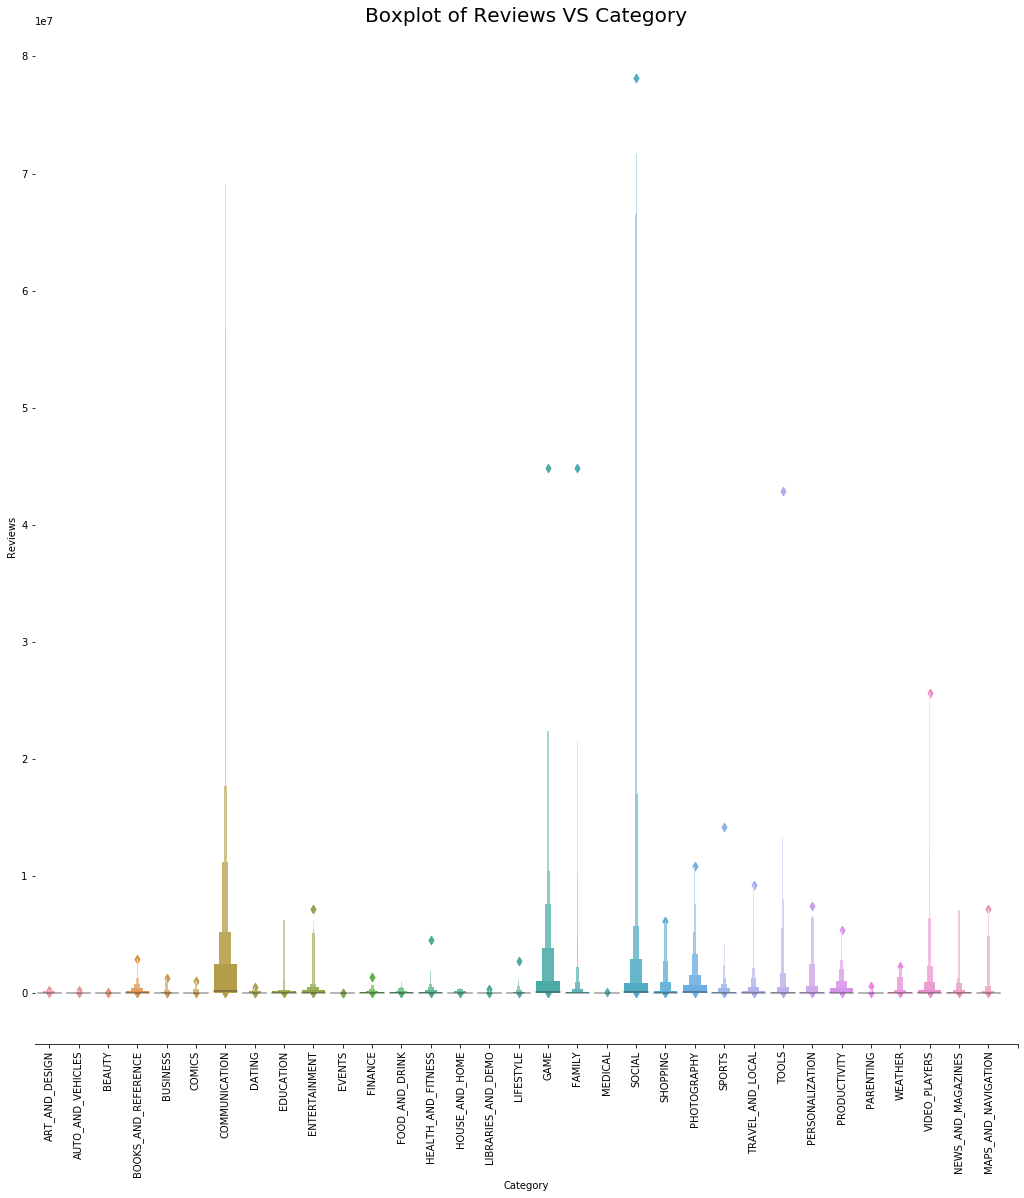

In [378]:
# 不同Category的APP评论数分布
# 注意，这里可能会有个别评论数非常多的APP，在绘图时可能会把图的尺度拉偏，可以适当阶段和处理

g=sns.catplot(x='Category',y='Reviews',data=apps[apps['Reviews']>500],height=15,kind='boxen')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Reviews")
plt.title('Boxplot of Reviews VS Category',size = 20)

In [212]:
# 找出评论数大于500w的app，并取出不同的APP名字

big_app=apps[apps['Reviews']>5000000]
big_app['App'].unique()

array(['Messenger – Text and Video Chat for Free', 'WhatsApp Messenger',
       'Google Chrome: Fast & Secure', 'Viber Messenger',
       'Opera Mini - fast web browser', 'WeChat',
       'UC Browser - Fast Download Private & Secure',
       'Skype - free IM & video calls', 'LINE: Free Calls & Messages',
       'BBM - Free Calls & Messages',
       'Truecaller: Caller ID, SMS spam blocking & Dialer',
       'Duolingo: Learn Languages Free', 'Netflix', 'Google Play Games',
       'Subway Surfers', 'Candy Crush Saga', 'slither.io', 'Clash Royale',
       'Temple Run 2', 'Pou', 'Candy Crush Soda Saga', 'Clash of Clans',
       '8 Ball Pool', 'Angry Birds Classic', 'Hill Climb Racing',
       'Minion Rush: Despicable Me Official Game', 'Farm Heroes Saga',
       'My Talking Angela',
       'Sniper 3D Gun Shooter: Free Shooting Games - FPS', 'Score! Hero',
       'Garena Free Fire', 'My Talking Tom', 'Dream League Soccer 2018',
       'Traffic Racer', 'Hungry Shark Evolution', 'Piano Tiles 

![imglink](http://emojimyface.com/wp-content/uploads/2015/01/msg-apps-icons-trans.png)

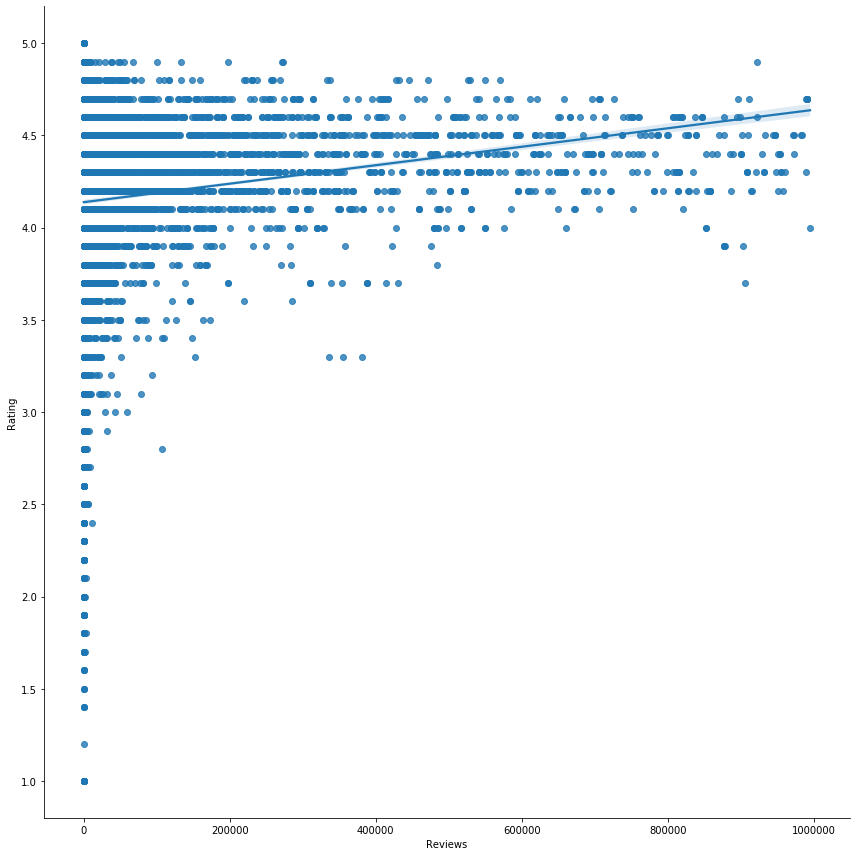

In [218]:
# 用seaborn的lmplot探寻评论数与打分的关系
# 注意，当我们作分析的时候，一般会适当对数据进行筛选，比如这里建议筛选评论数小于100w或者50w的app
rv_100w = apps[apps['Reviews']<1000000]

sns.lmplot(data=rv_100w,y='Rating',x='Reviews',height=12)

看起来好像热门的APP评分总体上会高一些

In [220]:
# 取得不同APP的Size(大小)的不同取值
apps['Size'].unique()


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [228]:
# 把其中的'Varies with device'替换成np.nan

apps['Size'].replace('Varies with device',np.nan,inplace= True)


In [243]:
# 进行大小的统一化，把kb换成1000，MB换成1000000

apps['Size'] = apps['Size'].replace(r'[kM]+$','',regex=True).astype('float')*apps.Size.str.extract(r'[\d\.]+([KM]+)',expand=False).fillna(1).replace(['k','M'],[10**3,10**6]).astype('int')

In [244]:
# 按照Category求平均，对我们刚才的缺失值进行填充
apps['Size'].fillna(apps.groupby('Category')['Size'].transform('mean'),inplace=True)


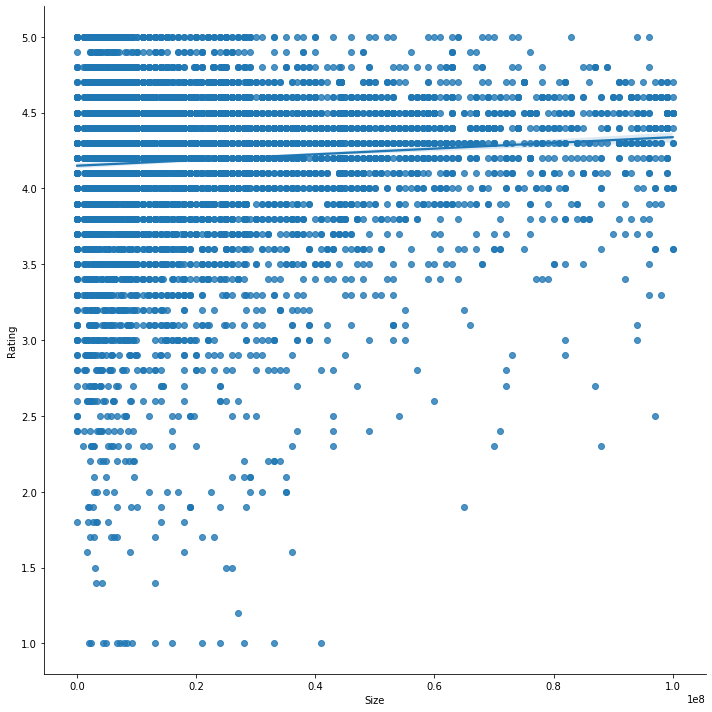

In [247]:
# 用可视化的方法探寻Size大小和Rating的关系

sns.lmplot(data=apps,x='Size',y='Rating',height=10)

In [254]:
# 查看不同的安装量

apps.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [253]:
# 把安装量替换成数字

apps.loc[:,'Installs']=apps['Installs'].apply(lambda x: x.replace(',','')).apply(lambda x:x.replace('+','')).apply(lambda x:int(x))

In [271]:
# 安装量数据量级差异太大，我们把安装量从小到大替换成 0，1，2，3...n这样的几个档位
numbers = sorted(list(apps.Installs.unique()))
apps.loc[:,'Installs'].replace(numbers,range(len(numbers)),inplace= True)
apps.Installs


0         9
1        12
2        14
3        16
4        11
         ..
10836     8
10837     5
10838     7
10839     7
10840    15
Name: Installs, Length: 10840, dtype: int64

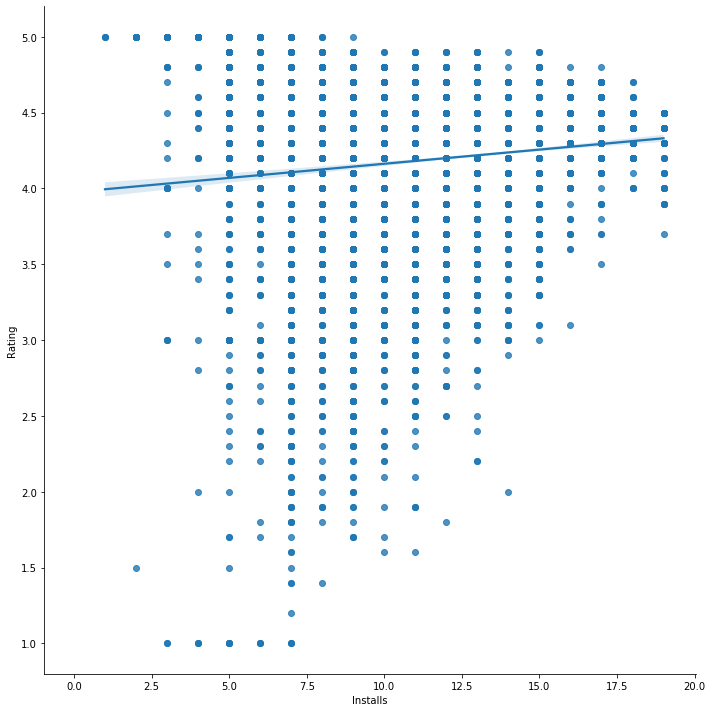

In [273]:
# 绘制安装等级和打分之间的关系图
# 可以用lmplot或者regplot，或者大家觉得合适的绘图方法

sns.lmplot(data=apps,x='Installs',y='Rating',height=10)

### 价格分析

In [281]:
# 用value_counts取出不同的价格，用head查看前10种
apps['Price'].value_counts().head(10)


0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
$3.99       63
$1.49       46
$5.99       30
$2.49       26
$9.99       21
Name: Price, dtype: int64

In [304]:
# 把价格转成浮点数型，并查看价格分布(describe)
apps.loc[:,'Price']=apps.loc[:,'Price'].apply(lambda x:x.replace('$','')).apply(lambda x:float(x))

AttributeError: 'float' object has no attribute 'replace'

In [305]:
apps.Price.describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

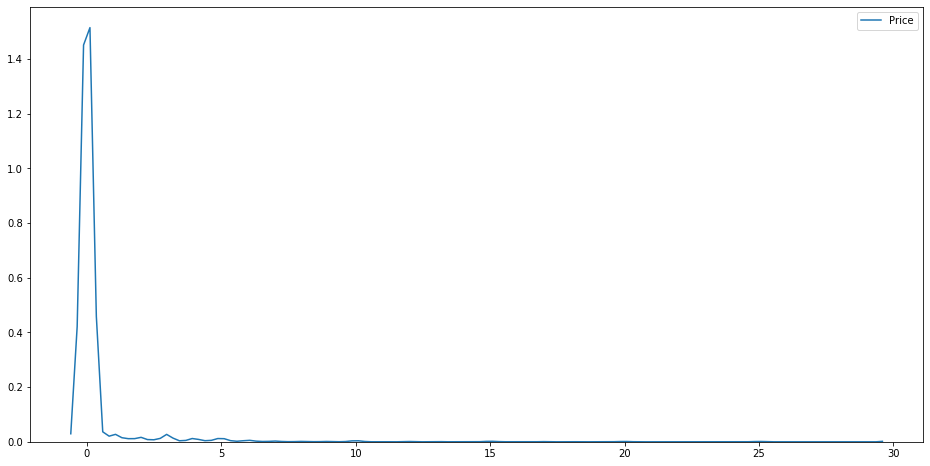

In [346]:
# >$29.9的属于比较贵的APP了
# 用distplot探寻一下价位<=$29.9元的APP分布
sns.kdeplot(apps[apps['Price']<=29.9]['Price'],bw=0.2)

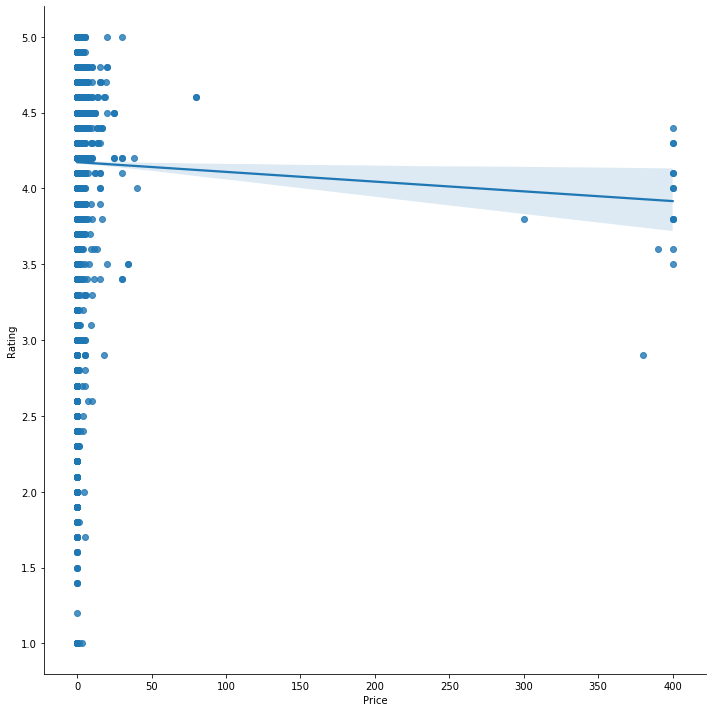

In [350]:
# Rating和Price价格之间是否有正向或者负向的关系？
# 通过 lmplot或者regplot分析一下
# 先做一个数据筛选，把评论数小于1000000的APP筛出来

sns.lmplot(data = apps[apps.Reviews<1000000],x='Price',y='Rating',height=10)

In [352]:
# 把价格按照 0, 0.99, 2.99, 4.99, 14.99, 29.99 为边界分成几段，重命名成列PriceBand

def get_PB(x):
    if x == 0:
        return '0 Free'
    elif x>0 and x<=0.99:
        return '1 cheap'
    elif x>0.99 and x<=2.99:
        return '2 not cheap'
    elif x>2.99 and x<=4.99:
        return '3 normal'
    elif x>4.99 and x<=14.99:
        return '4 expensive'
    elif x>14.99 and x<=29.99:
        return '5 really expensive'
    else:
        return '6 too expensive'
apps.loc[:,'PriceBand'] = apps.loc[:,'Price'].apply(get_PB)

In [354]:
# 求每个价格段的打分平均值

apps.groupby('PriceBand').mean()['Rating']

PriceBand
0 Free                4.186203
1 cheap               4.298131
2 not cheap           4.293416
3 normal              4.250318
4 expensive           4.269149
5 really expensive    4.252000
6 too expensive       3.923810
Name: Rating, dtype: float64

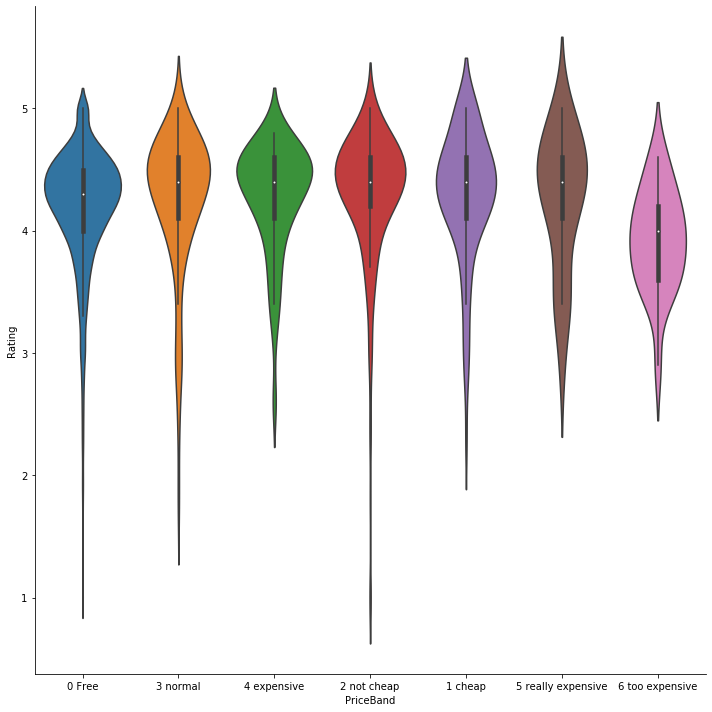

In [357]:
# 查看每个价格段的打分Rating分布(Boxplot或者voilin plot)

sns.catplot(data=apps,x='PriceBand',y='Rating',kind='violin',height=10)

### 题材类型

In [362]:
# 有多少种不同的题材类型(Genres)？
# 分别是什么？

print(len(apps.Genres.unique()),'种')
apps.Genres.unique()

119 种


array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [371]:
# 我们发现有归属多个题材类型的情况(比如Parenting;Brain Games)
# 我们取第一个作为主题材类型
apps.loc[:,'Genres']=apps.Genres.apply(lambda x:x.split(';')[0])

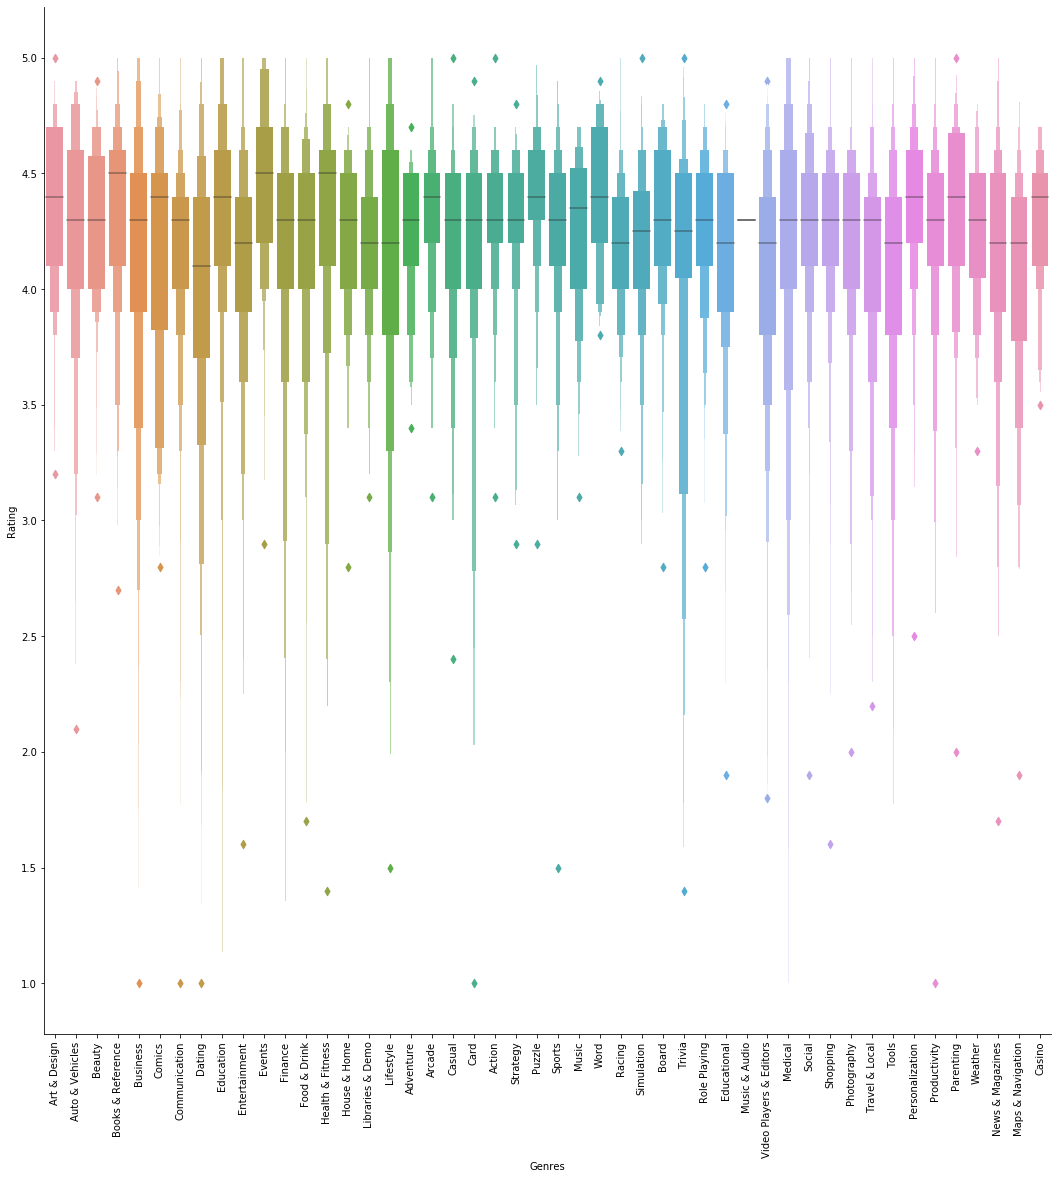

In [377]:
# 不同题材的打分分布是什么样的
# 提示：可以分组用boxplot
g=sns.catplot(data=apps,x='Genres',y='Rating',kind='boxen',height=15)
g.set_xticklabels(rotation=90)


### 更新时间

In [401]:
# 新建字段，显示当前APP最新更新时间距离APP商店所有APP中最近一次更新时间的天数
# 提示：转成datetime类型
apps.loc[:,'Time'] = apps.loc[:,'Last Updated'].apply(lambda x:pd.to_datetime(x))
apps.loc[:,'LastUpdate']=(apps['Time']-apps.Time.max()).dt.days
apps.LastUpdate

0        -213
1        -205
2          -7
3         -61
4         -49
         ... 
10836    -379
10837     -33
10838    -565
10839   -1297
10840     -14
Name: LastUpdate, Length: 10840, dtype: int64

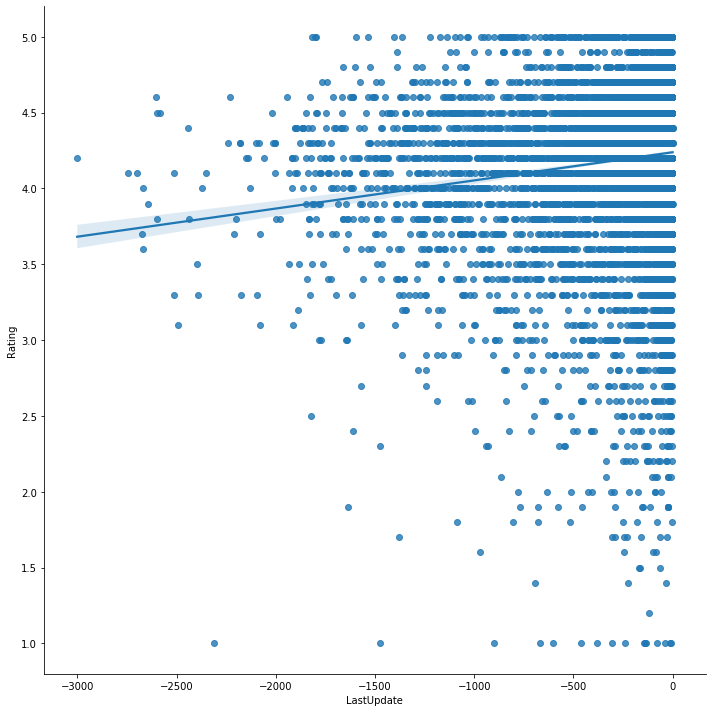

In [403]:
sns.lmplot(data=apps,x='LastUpdate',y='Rating',height=10)